<a href="https://colab.research.google.com/github/JagadishSivakumar/Corona_Outbreak_Prediction/blob/master/Corona_Outbreak_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [0]:
import pandas as pd

# Visalisation Libraries
import matplotlib.pyplot as plt

%matplotlib inline
# Inline command to show all plots in same window

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Folium Package to show map layouts
import folium
from folium import plugins

# Plot Size Manipulation
plt.rcParams['figure.figsize'] = 10, 12

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

**Corona Virus in India**
1. 30th Jan , a student from Wuhan 
2. 2nd March , 6 cases
3. 4th March , 32

First 100 Cases on 14th March

Currently as of 3rd May - 39,980 Cases & 1301 Deaths

**Pandemics Growth**

Pandemics growth is exponential growth, after a point there will be no one for the virus to affect. So it gets saturated.

This is statistically a sigmoid curve

**Sigmoid**

The slope on any point of the curve, gives us the number of new cases on daily bases

**Solution**

Is to flatten the curve, as we exceed the Healthcare Resources by reducing commuting

**Datasets Sources**
1. Government Websites
2. Time Series - John Hopkins updated Git

Overall Source Download from Edureka

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Reading Dataset , excel file by creating dataframes

df = pd.read_excel('/content/drive/My Drive/corona_outbreak/Covid cases in India.xlsx')

df_India = df.copy()

df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [0]:
# Co ordinates and Union Territories

India_coord = pd.read_excel('/content/drive/My Drive/corona_outbreak/Indian Coordinates.xlsx')

# Daily basis increase in India, Korea, Italy, Wuhan
dbd_India = pd.read_excel('/content/drive/My Drive/corona_outbreak/per_day_cases.xlsx', parse_dates=True, sheet_name = "India")

dbd_Italy = pd.read_excel('/content/drive/My Drive/corona_outbreak/per_day_cases.xlsx' , parse_dates = True, sheet_name = "Italy")

dbd_Korea = pd.read_excel('/content/drive/My Drive/corona_outbreak/per_day_cases.xlsx' , parse_dates = True, sheet_name = "Korea")

dbd_Wuhan = pd.read_excel('/content/drive/My Drive/corona_outbreak/per_day_cases.xlsx' , parse_dates = True, sheet_name = "Wuhan")

In [0]:
# Confirmed Cases in India (22nd March, 2020)

# Removing S.No col
df.drop(['S. No.'],axis = 1, inplace = True)

# Total Cases Indian + Foreign Nationals
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

print("Total Cases Indian + International", "\n", df['Total cases'])

# Sum of Total Cases

total_cases = df['Total cases'].sum()

print("Sum of Total Cases : " , total_cases)

Total Cases Indian + International 
 0       9
1       3
2       1
3      31
4      33
5      28
6       3
7      41
8     109
9       9
10    101
11      1
12      1
13      2
14      1
15     29
16     32
17     18
18     35
19      7
20      7
21     13
22     35
23      4
24      9
Name: Total cases, dtype: int64
Sum of Total Cases :  562


In [0]:
# Visual from highlighted dataframe
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


**Analysis as of 22/03**

Kerala - 109 affected & 0 dead

Maharastra - 98 affected & 2 dead

In [0]:
# Total Active Cases in India

df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])

total_active = df['Total Active'].sum()

print("Total Active Cases as of 22/03 : ", total_active)

# Group by States / UT and convert to dF

Tot_Cases = df.groupby("Name of State / UT")["Total Active"].sum().sort_values(ascending = False).to_frame()

Tot_Cases.style.background_gradient(cmap="Reds")

Total Active Cases as of 22/03 :  512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


**View Geographically , Folium Package**

In [0]:
# Folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

**Confirmed vs Recovered Figures**

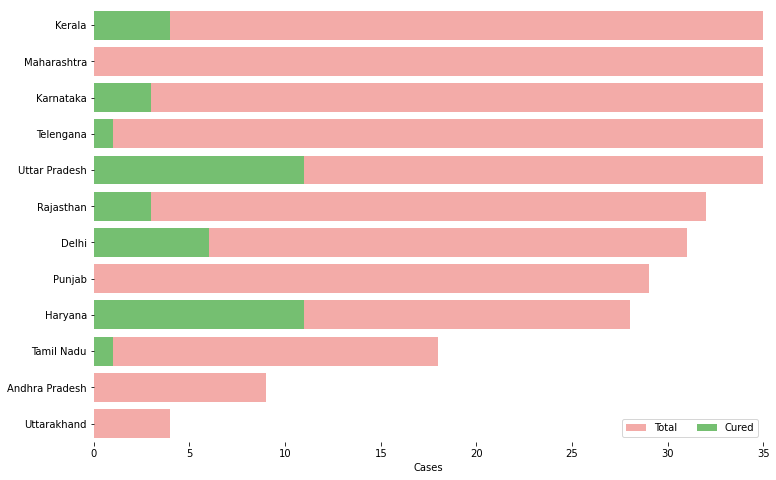

In [0]:
# Seaborn Visualisation 

"""
Bar Graph for total number of cases per State vs Total no of cured cases
"""

f, ax = plt.subplots(figsize=(12,8))

data = df_full[["Name of State / UT", "Total cases", "Cured" , "Death"]]
data.sort_values("Total cases" , ascending = False, inplace = True)

sns.set_color_codes("pastel")
sns.barplot(x = "Total cases" , y = "Name of State / UT" , data = data, label = "Total" , color = "r")


sns.set_color_codes("muted")
sns.barplot(x="Cured" , y = "Name of State / UT" , data = data, label = "Cured", color = "g")

# Legend for Bar Graphs
ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(xlim = (0,35) , ylabel = "" , xlabel = "Cases")
sns.despine(left = True, bottom = True)

In [0]:
# Rise of Covid 19 Cases in India using plotly

fig = go.Figure()
fig.add_trace(go.Scatter(x = dbd_India['Date'], y = dbd_India['Total Cases'], mode = 'lines+markers' , name = 'Total Cases'))
fig.update_layout(title_text = "Trend of Coronavirus Cases in India")
fig.show()



# New Corona Virus Case in India

import plotly.express as px
fig = px.bar(dbd_India, x = "Date" , y = "New Cases", barmode = 'group', height=400)
fig.update_layout(title_text = "Coronavirus Cases in India on daily basis")
fig.show()



In [0]:
# Trends in India vs Italy vs South Korea vs Wuhan

fig = px.bar(dbd_India, x = "Date" , y = "Total Cases", barmode = 'group', height=400, title = "Confirmed Cases in India", color_discrete_sequence= px.colors.cyclical.IceFire)
fig.show()

fig = px.bar(dbd_Italy, x = "Date" , y = "Total Cases", barmode = 'group', height=400, orientation="v", title = "Confirmed Cases in Italy")
fig.show()

fig = px.bar(dbd_Korea, x = "Date" , y = "Total Cases", barmode = 'group', height=400, orientation="v", title = "Confirmed Cases in South Korea")
fig.show()


fig = px.bar(dbd_Wuhan, x = "Date" , y = "Total Cases", barmode = 'group', height=400, orientation="v", title = "Confirmed Cases in Wuhan, China")
fig.show()


### China Came out of AI system

China successfully started to flatten the curve. 
They Started with AI model - Heat Mapping on Human Body by Baidu.

**Analysing World Wide Date - Time Series**

Time Series data of Confirmed, Deaths, Recovered => Data from Johns Hopkins University

In [0]:
# Importing Time Series Data

df = pd.read_csv('/content/drive/My Drive/corona_outbreak/covid_19_clean_complete.csv', parse_dates = ['Date'])
df.rename(columns= {'ObservationDate' : 'Date', 'Country/Region' : 'Country'}, inplace=True)


# Import dataset of Confirmed, Recovered , Deaths
df_confirmed = pd.read_csv('/content/drive/My Drive/corona_outbreak/time_series_covid19_confirmed_global.csv')

df_recovered = pd.read_csv('/content/drive/My Drive/corona_outbreak/time_series_covid19_recovered_global.csv')

df_deaths = pd.read_csv('/content/drive/My Drive/corona_outbreak/time_series_covid19_deaths_global.csv')


# Renaming Col names to ease usage
df_confirmed.rename(columns = {'Country/Region' : 'Country'}, inplace = True)
df_recovered.rename(columns = {'Country/Region' : 'Country'}, inplace = True)
df_deaths.rename(columns = {'Country/Region' : 'Country'}, inplace = True)

df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [0]:
# Using Groupby - creating a Long dataframe instead of Wide, Ommiting Lat. and Long. data

df2 = df.groupby(['Date', 'Country', 'Province/State'])[['Date' , 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']]

df2.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,NaN,Thailand,2.0,0.0,0.0
1,2020-01-22,NaN,Japan,2.0,0.0,0.0
2,2020-01-22,NaN,Singapore,0.0,0.0,0.0
3,2020-01-22,NaN,Nepal,0.0,0.0,0.0
4,2020-01-22,NaN,Malaysia,0.0,0.0,0.0
...,...,...,...,...,...,...
19191,2020-03-23,Sint Maarten,Netherlands,1.0,0.0,0.0
19194,2020-03-23,Isle of Man,United Kingdom,5.0,0.0,0.0
19196,2020-03-23,Northwest Territories,Canada,1.0,0.0,0.0
19210,2020-03-23,United States Virgin Islands,US,6.0,0.0,0.0


In [0]:
# Check India's Data
df.query('Country=="India"').groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [0]:
# Visualising World wide Covid - 19 cases

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

deaths = df.groupby('Date').sum()['Deaths'].reset_index()

recovered = df.groupby('Date').sum()['Recovered'].reset_index()


# Plotting Date Wise Confirmed Cases - Lines with markers
fig = go.Figure()

# Confirmed - Red
fig.add_trace(go.Scatter(x = confirmed['Date'] , y = confirmed['Confirmed'], mode = 'lines+markers' , name = "Confirmed", line=dict(color = "Red")))

# Recovered - Green
fig.add_trace(go.Scatter(x = recovered['Date'] , y = recovered['Recovered'], mode = 'lines+markers' , name = "Recovered", line=dict(color = "Green")))

# Deaths - Blue
fig.add_trace(go.Scatter(x = confirmed['Date'] , y = deaths['Deaths'], mode = 'lines+markers' , name = "Deaths", line=dict(color = "Blue")))

# Plot Decoration
fig.update_layout(title = 'Worldwide Covid 19 Cases' , xaxis_tickfont_size = 14, xaxis = dict(title="Period / Jan 19 - Mar 23") , yaxis = dict(title="Number of Cases"))

fig.show()

### SuddenRise in Confirmed Cases Feb 12 - 15 in the curve

Skew - instead of perfect curve

The Research body - cameup with new way of calculating Corona affected patients. Thus a massive increase in count on 13/02

**Facebook Prophet**

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

1. Shift in trend with missing data
2. Handles outliers well
3. Fully automatic and tunable

https://facebook.github.io/prophet/


In [0]:
# Importing Prophet 

from fbprophet import Prophet 

In [0]:
# Data Set import 

"""
Confirmed, Death, Recovered
"""

# Index Reset - used to create a new Series , DataFrame with index reset, without inserting any new column
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

deaths = df.groupby('Date').sum()['Deaths'].reset_index()

recovered = df.groupby('Date').sum()['Recovered'].reset_index()


**Prophet Structure**
1. 2 inputs - ds, y
2. ds - datestamp, YYYY-MM-DD, HH:MM:SS for timestamp
3. y - values, numeric measurement we wish to forecast

In [0]:
confirmed.columns = ["ds" , "y"]

confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [0]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


## Prophet Prediction for a week ahead - Worldwide Confirmed Cases

DataSet available till 23/03

Prediction till 30/03

In [0]:
# Generating a forecast for a week ahead with Prophet

m = Prophet(interval_width=0.95) #interval_width is confidence

m.fit(confirmed)

future = m.make_future_dataframe(periods = 7)

future.tail()


# New dataframe with in data fit

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [0]:
# Upper and Lower limit - Tolerance for forecast
forecast = m.predict(future)

forecast[['ds', 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,334276.716798,375185.627355
65,2020-03-27,372235.326938,350291.289577,392867.823053
66,2020-03-28,388674.964143,366566.643994,411471.413032
67,2020-03-29,405307.954675,382863.507584,428267.122950
68,2020-03-30,418529.648466,395605.850028,440813.771862


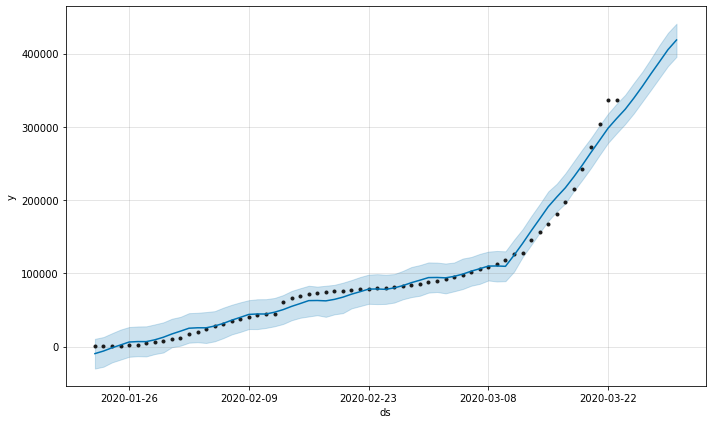

In [0]:
# Visualising Forecast Future DataFrame - Prediction

confirmed_forecast_plot = m.plot(forecast)

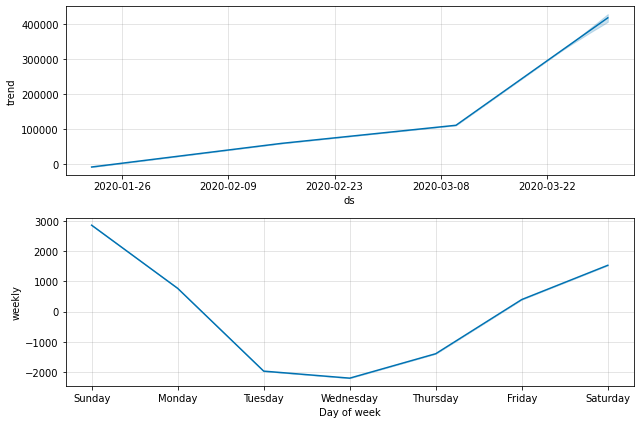

In [0]:
# Week Zoomed In

confirmed_forecast_plot = m.plot_components(forecast)

**Dip in Wednesday**

On analysing dataset, there was a huge dip in China on Wednesday


**Janata Curfew from 24/03 - Sunday**
1. International flights called off
2. Complete Lockdown


## Prophet Prediction for a week ahead - Worldwide Death





In [0]:
deaths.columns = ["ds" , "y"]

deaths['ds'] = pd.to_datetime(deaths['ds'])

In [0]:
m = Prophet(interval_width=0.95)

m.fit(deaths)

future = m.make_future_dataframe(periods = 7)

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [0]:
forecast = m.predict(future)

forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14476.530988,16324.011032
65,2020-03-27,16199.617603,15247.809447,17105.570170
66,2020-03-28,17006.904589,16041.122115,17961.021212
67,2020-03-29,17831.505383,16788.340418,18893.334253
68,2020-03-30,18490.986176,17458.107712,19609.153613


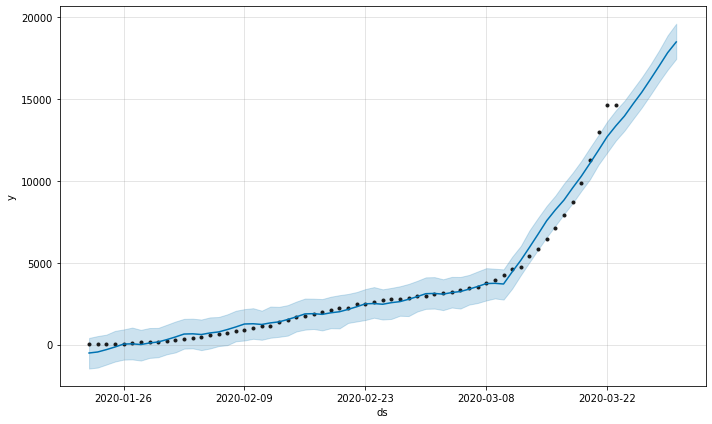

In [0]:
deaths_forecast_plot = m.plot(forecast)

After rise the numbers are skewed a bit, but they all fall under tolerance

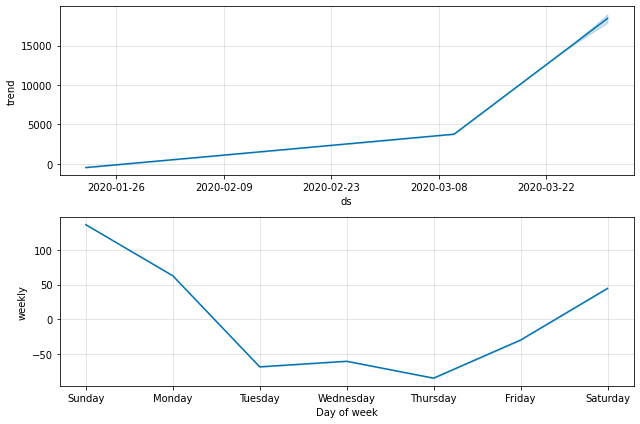

In [0]:
deaths_forecast_plot = m.plot_components(forecast)

## Prophet Prediction for a week ahead - Worldwide Recovered Cases


In [0]:
recovered.columns

Index(['Date', 'Recovered'], dtype='object')

In [0]:
recovered.tail()

,Date,Recovered
57,2020-03-19,84854.0
58,2020-03-20,87256.0
59,2020-03-21,91499.0
60,2020-03-22,97704.0
61,2020-03-23,98334.0


In [0]:
recovered.columns = ['ds' , 'y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [0]:
m = Prophet(interval_width=0.95)

m.fit(recovered)

future = m.make_future_dataframe(periods = 7)

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [0]:
forecast = m.predict(future)
forecast[['ds' , 'yhat' , 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101314.716475,104814.433604
65,2020-03-27,105338.025042,103541.625137,107196.783872
66,2020-03-28,108256.310813,106231.014334,110315.107669
67,2020-03-29,111119.296170,108688.970922,113734.696368
68,2020-03-30,113244.961749,110676.481554,116013.225455


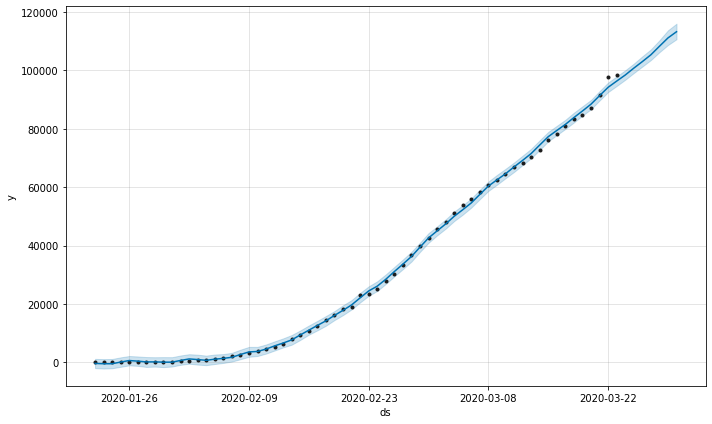

In [0]:
recovered_forecast_plot = m.plot(forecast)

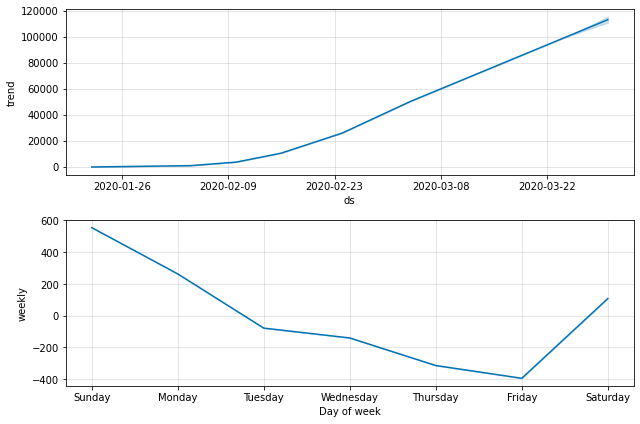

In [0]:
recovered_forecast_plot = m.plot_components(forecast)

Most number of recovered cases are on Sunday, Monday


---



---


From out model - Most number of confirmed cases are also on Sunday and Monday


## Conclusion 

Will India become Next Italy, South Korea , Wuhan ?

Yes, if we look at the world's data and its forecast we can say India might face one of its worst days


---
Thus, Strict Lockdown must be implemented to overcome spread of Disease and stabilize the curve.

India in 2nd stage as of Mar - 29 and is 145th Place

Italy - 2nd

In India, 
The fatality is predicted to be only 2% of affected crowd but the forecasted crowd is about 60% of world population.
